In [1]:
from pyslise import PySE2d
import numpy as np

In [3]:
var('x,y')
V = fast_callable(2*(.5*(x^2+y^2) + 1/4/sqrt(5)*x*(y^2-1/3*x^2)), vars=[x, y], domain=float)

p = PySE2d(V, -6,6,-6,6,
           x_tolerance=1e-6, y_tolerance=1e-3, in_sector_count=1, N=12, grid_points=60)

In [6]:
for s in p.__sectors:
    print s.matslise.__sectorCount, s.min, s.max

26 -6.0 -5.94
26 -5.94 -5.48647615235
26 -5.48647615235 -5.03295230469
25 -5.03295230469 -4.55061947423
26 -4.55061947423 -4.06828664377
27 -4.06828664377 -3.58595381331
28 -3.58595381331 -3.07295219842
28 -3.07295219842 -2.55995058352
29 -2.55995058352 -2.00786861767
28 -2.00786861767 -1.41391785758
28 -1.41391785758 -0.760490772567
28 -0.760490772567 -0.0371642127579
27 -0.0371642127579 0.0371642129227
29 0.0371642129227 0.760490772717
29 0.760490772717 1.41391785772
29 1.41391785772 2.0078686178
29 2.0078686178 2.55995058365
27 2.55995058365 3.07295219854
27 3.07295219854 3.58595381343
26 3.58595381343 4.06828664387
27 4.06828664387 4.55061947432
27 4.55061947432 5.03295230476
26 5.03295230476 5.48647615238
26 5.48647615238 5.94
26 5.94 6.0


In [10]:
s = p.findEigenvalues(0, 10)

In [14]:
p.computeEigenfunction(s[0], [1,2,3],[1,2])[0].shape

(3, 2)

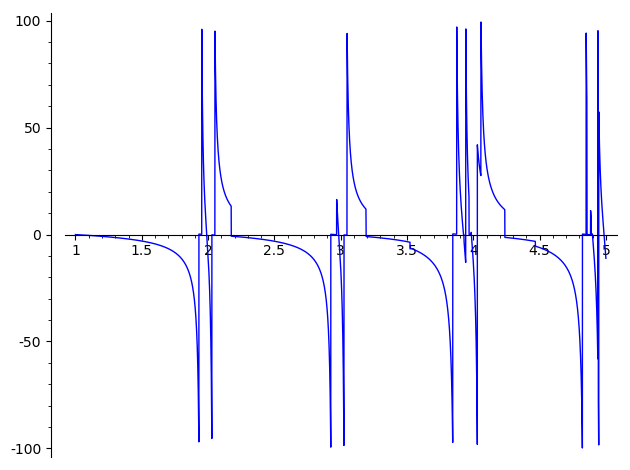

In [6]:
plot(lambda E: p.calculateError(2*E)[0], (1,5))

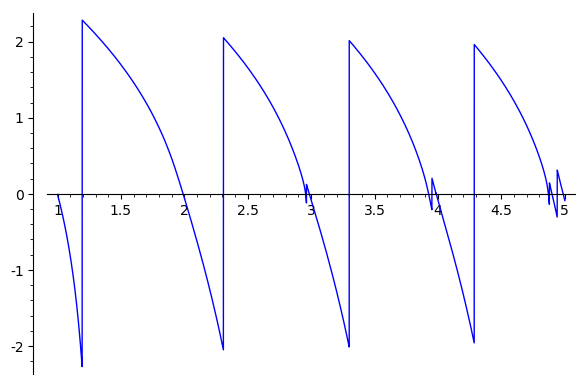

In [3]:
plot(lambda E: p.calculateError(2*E, PySE2d.ABS_SORTER)[0], (1,5))

In [17]:
def linspace(a, b, n):
    return a + (b-a)*np.arange(0, n+1, dtype="float")/n

def expand(f):
    return lambda d: f(*d)

In [18]:
n = 1000
Es = linspace(5,8, n)
err, derr = zip(*map(expand(zip), [p.calculateErrors(2*E, p.ABS_SORTER) for E in Es]))

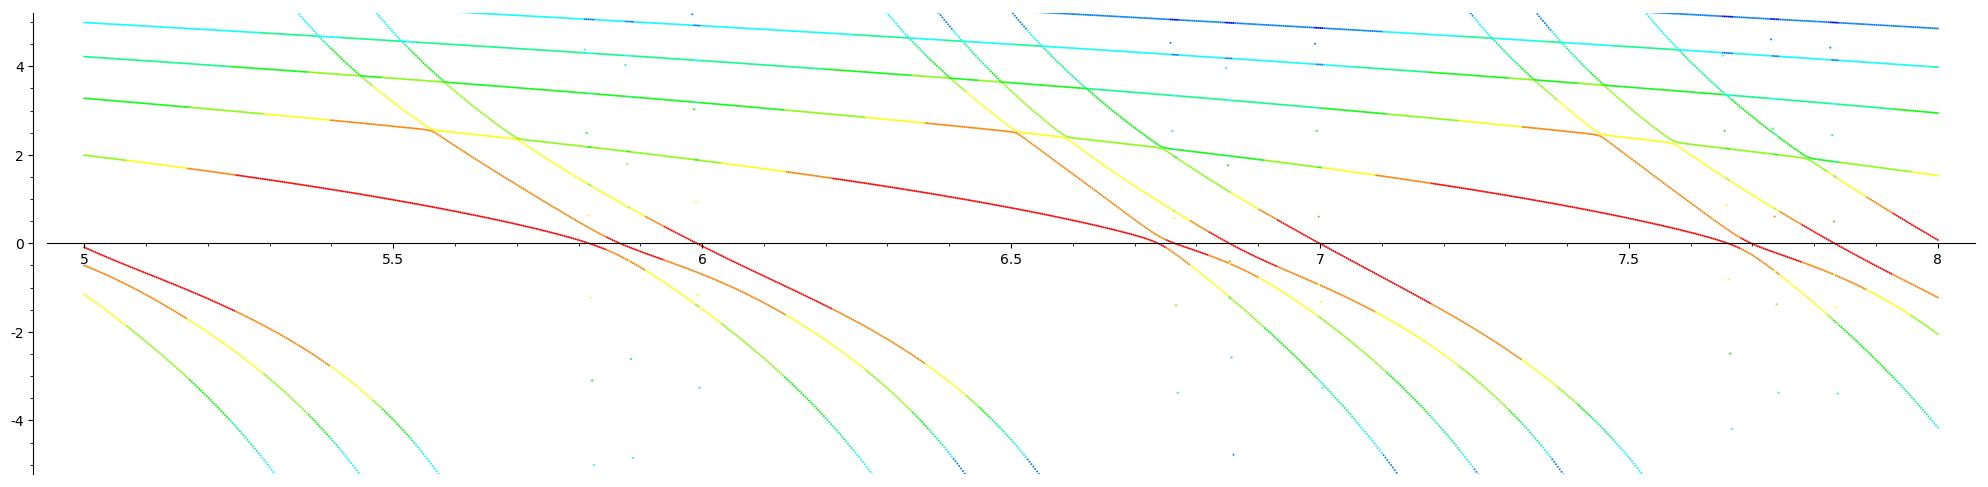

In [19]:
sum(list_plot(zip(Es, errs), size=2, color=hue(i/12)) for i, errs in enumerate(zip(*err))).show(ymin=-5, ymax=5, figsize=[20,5])